In [2]:
import sys
# !{sys.executable} -m pip install tensorflow 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd1200
import seaborn as sns
import tensorflow as tf
import geopandas as gpd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
np.set_printoptions(precision=3, suppress=True)


In [3]:
!python3 --version

Python 3.6.8


In [5]:
print("System Initiated")
print("Importing glacier area data")
g = gpd.read_file("~/data/glac/glims/glims_download_13173/glims_polygons.shp")
print("Import complete")
print("Sorting data")
g = g.drop("line_type", axis=1)
g = g.drop("anlys_id", axis=1)
g = g.drop("anlys_time", axis=1)
g = g.drop("primeclass", axis=1)
g = g.drop("src_date", axis=1)
g = g.drop("rec_status", axis=1)
g = g.drop("glac_name", axis=1)
g = g.drop("wgms_id", axis=1)
g = g.drop("local_id", axis=1)
g = g.drop("glac_stat", axis=1)
g = g.drop("subm_id", axis=1)
g = g.drop("release_dt", axis=1)
g = g.drop("proc_desc", axis=1)
g = g.drop("rc_id", axis=1)
g = g.drop("chief_affl", axis=1)
g = g.drop("loc_unc_x", axis=1)
g = g.drop("loc_unc_y", axis=1)
g = g.drop("glob_unc_x", axis=1)
g = g.drop("glob_unc_y", axis=1)
g = g.drop("submitters", axis=1)
g = g.drop("analysts", axis=1)
g = g.drop("geog_area", axis=1)

glim = gpd.GeoDataFrame(g)
print("computing areas")
# glim = glim.set_index("glac_id")
glim["area_calc"] = glim.area

print("computing boundaries")
glim["boundary"] = glim.boundary

print("finding glacier centers")
glim["point_cent"] = glim.centroid

glim_cent_first = glim["point_cent"].astype(str).str.split('(').str[1]
glim_cent = glim_cent_first.astype(str).str.split(')').str[0]
glim["cent_lat"] = glim_cent.str.split(' ').str[0]
glim["cent_lon"] = glim_cent.str.split(' ').str[1]
glim = glim.drop("point_cent", axis=1)
print("glim complete")

System Initiated
Importing glacier area data
Import complete
Sorting data
computing areas


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



computing boundaries
finding glacier centers


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



glim complete


In [6]:
glim = gpd.GeoDataFrame(glim)
glim

,glac_id,area,db_area,width,length,min_elev,mean_elev,max_elev,geometry,area_calc,boundary,cent_lat,cent_lon
0,G006338E44942N,0.0041,0.010639,0.0,61.1478,3040.0,3052.0,3067.0,"POLYGON Z ((6.33947 44.94271 0.00000, 6.33948 ...",7.409245e-07,"LINESTRING Z (6.33947 44.94271 0.00000, 6.3394...",6.339111476117562,44.94257012293514
1,G006337E44931N,1.9080,1.907390,0.0,3558.5700,2434.0,2823.0,3330.0,"POLYGON Z ((6.34182 44.93278 0.00000, 6.34179 ...",1.199639e-06,"LINESTRING Z (6.34182 44.93278 0.00000, 6.3417...",6.342726877022399,44.93296683258707
2,G006337E44931N,1.9080,1.907390,0.0,3558.5700,2434.0,2823.0,3330.0,"POLYGON Z ((6.34330 44.93374 0.00000, 6.34329 ...",5.840810e-07,"LINESTRING Z (6.34330 44.93374 0.00000, 6.3432...",6.344573208983003,44.93374791197513
3,G006992E45913N,7.6856,7.687140,0.0,5010.4600,2276.0,3033.0,3723.0,"POLYGON Z ((6.98901 45.91748 0.00000, 6.98863 ...",1.217226e-06,"LINESTRING Z (6.98901 45.91748 0.00000, 6.9886...",6.98831909347378,45.91755498106596
4,G006340E45124N,0.1238,0.123768,0.0,670.7820,2807.0,2968.0,3169.0,"POLYGON Z ((6.34349 45.12189 0.00000, 6.34360 ...",3.264490e-07,"LINESTRING Z (6.34349 45.12189 0.00000, 6.3436...",6.343387258569232,45.12151757588067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565882,G284320E82523N,0.0423,0.040084,0.0,0.0000,1025.0,1057.0,1091.0,"POLYGON Z ((-75.67189 82.52173 0.00000, -75.67...",2.469552e-05,"LINESTRING Z (-75.67189 82.52173 0.00000, -75....",-75.68020982730646,82.52256321060699
565883,G272536E81110N,0.0342,0.032650,0.0,0.0000,756.0,800.0,856.0,"POLYGON Z ((-87.46334 81.10926 0.00000, -87.46...",1.694120e-05,"LINESTRING Z (-87.46334 81.10926 0.00000, -87....",-87.46345366928466,81.11040395619679
565884,G279392E81305N,11.2329,11.797800,0.0,0.0000,364.0,1028.0,1608.0,"POLYGON Z ((-80.53228 81.30649 0.00000, -80.53...",6.246743e-03,MULTILINESTRING Z ((-80.53228 81.30649 0.00000...,-80.5927930600203,81.28997897071714
565885,G290767E82689N,0.1215,0.123473,0.0,0.0000,1244.0,1395.0,1481.0,"POLYGON Z ((-69.25135 82.68895 0.00000, -69.24...",7.778976e-05,"LINESTRING Z (-69.25135 82.68895 0.00000, -69....",-69.23044456094688,82.68880563440219


In [9]:
glim[glim["glac_id"]=="G016068E78246N"]

,glac_id,area,db_area,width,length,min_elev,mean_elev,max_elev,geometry,area_calc,boundary,cent_lat,cent_lon
86284,G016068E78246N,2.16262,2.16429,0.0,3633.9,0.0,0.0,0.0,"POLYGON Z ((16.10579 78.24877 0.00000, 16.1035...",0.000852,"LINESTRING Z (16.10579 78.24877 0.00000, 16.10...",16.06112732955177,78.24454336946827
380971,G016068E78246N,0.00000,3.12954,0.0,0.0,0.0,0.0,0.0,"POLYGON Z ((15.99625 78.24511 0.00000, 15.9949...",0.001232,"LINESTRING Z (15.99625 78.24511 0.00000, 15.99...",16.04978757366267,78.24540753144232
382931,G016068E78246N,0.00000,2.37853,0.0,0.0,0.0,0.0,0.0,"POLYGON Z ((16.10512 78.24915 0.00000, 16.1110...",0.000936,"LINESTRING Z (16.10512 78.24915 0.00000, 16.11...",16.05571685640311,78.24489211724132


CPU times: user 2min 2s, sys: 2.94 s, total: 2min 5s
Wall time: 2min 6s


<AxesSubplot:>

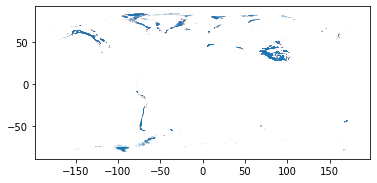

In [4]:
%%time
glim.plot()

In [5]:
print(glim.crs)

None


In [5]:
glim["area_calc"].iloc[[2]]

glac_id
G006337E44931N    5.840810e-07
Name: area_calc, dtype: float64

In [6]:
glim["area"].iloc[[2]]

glac_id
G006337E44931N    1.908
Name: area, dtype: float64

<AxesSubplot:>

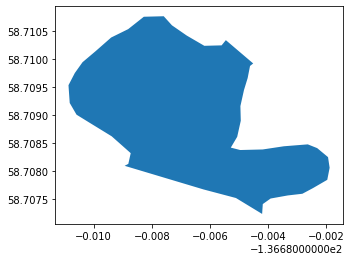

In [3]:
glim.iloc[[3595]].plot()